# 딥러닝 테스트

## seqence to sequence 예측
N개 정도로 작은 데이터셋이므로 pretrained model의 도움을 받을 수 없습니다. 또한 어떤 corpus에서 추출된 문장인지와, source와 target 간의 관계를 모르기 때문에 데이터를 관찰해야 합니다.

# EDA
target과 source에 동일한 embedding을 활용할 수 있을지 판단하기 위해 데이터를 관찰합니다. 두 가지를 중점적으로 살펴봤습니다.

* token_id가 겹치는지: id가 겹친다면 같은 token을 의미하는지 따져야 합니다.
* 추가적으로 tokenize할 필요성이 있는지: 반복되는 subsequence가 많다면 추가적인 tokenization이 모델의 성능을 향상시킵니다.
 

In [1]:
import pandas as pd
PATH = "/content/drive/MyDrive/2022취업/Naver-papago"
source = pd.read_csv(PATH + "/train_source.txt", sep="\t", names=["tokens_source"])
source

,tokens_source
0,601 52 584 342 416 271 68 311 584 342 68 33 20...
1,140 227 437 95 437 68 200 95 437 68 157 584 68...
2,200 52 52 584 342 157 140
3,78 311 68 52 584 78 33 342 140 437 95 68 105 3...
4,29 227 200 140 68 140 105 78 437
...,...
7255,140 227 105 35 68 200 95 437 200 68 105 35 68 ...
7256,202 68 105 95 584 157
7257,271 584 68 311 584 342 68 227 200 156 437 68 2...
7258,52 584 78 33 416 437 140 437


In [2]:
target = pd.read_csv(PATH + "/train_target.txt", sep="\t", names=["tokens_target"])
target

,tokens_target
0,593 163 68 76 648 199 68 269 68 59 290 171 211...
1,70 189 68 607 68 197 86 68 287 85 68 359 70 15...
2,189 491 487 359
3,43 158 68 431 187 299 68 158 108 68 89 487
4,283 68 136 479
...,...
7255,19 85 68 343 189 211 189 68 158 108 68 321 240...
7256,59 67 68 607 158 390
7257,370 68 5 68 81 68 201 258 68 640 542 118 85
7258,431 64 211 359


In [3]:
def to_tkn_lst(x):
    res = x.split()
    res = [int(char) for char in res]
    if not isinstance(res, list):
        return [res]
    return res

In [4]:
src = source['tokens_source'].apply(to_tkn_lst)  # token을 원소로 갖는 리스트로 변환합니다.
tgt = target['tokens_target'].apply(to_tkn_lst)

In [5]:
combined = pd.merge(src, tgt, left_index=True, right_index=True)
combined.sort_values(by='tokens_source', inplace=True)

In [6]:
combined

,tokens_source,tokens_target
4514,"[23, 105, 33, 33, 437, 95]","[199, 290]"
2577,"[29, 95, 200, 33, 68, 342, 33]","[391, 68, 640]"
6900,"[29, 95, 584, 157, 402]",[124]
5015,"[29, 95, 584, 157, 402]",[124]
3800,"[29, 95, 584, 157, 402]",[124]
...,...,...
3085,"[619, 584, 95, 437, 200, 157, 68, 304, 584, 58...","[36, 211, 390, 68, 182, 149]"
3233,"[619, 584, 95, 437, 200, 157, 68, 402, 342, 10...","[36, 211, 315, 68, 408, 158, 108]"
4848,"[619, 584, 95, 437, 200, 157, 68, 437, 78, 263...","[36, 211, 315, 68, 628, 247, 334]"
801,"[619, 584, 95, 437, 200, 327]","[36, 211, 607]"


src의 최소 길이 : 2
src의 최대 길이 : 81
src의 평균 길이 : 18.985399449035814
tgt의 최소 길이 : 1
tgt의 최대 길이 : 54
tgt의 평균 길이 : 10.051928374655647


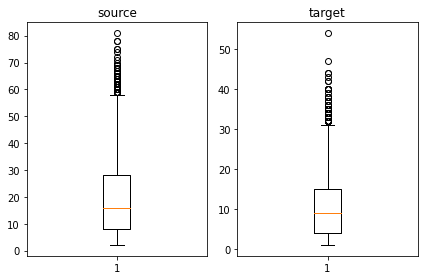

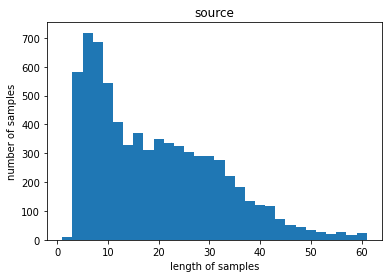

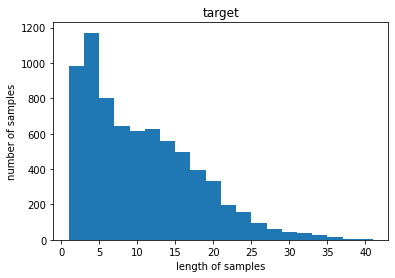

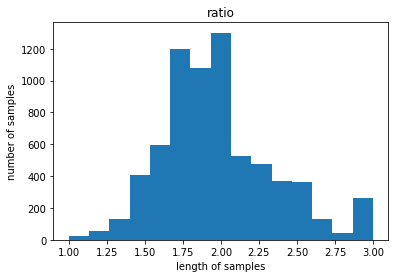

In [7]:
import matplotlib.pyplot as plt
import numpy as np


src_len = [len(s) for s in combined['tokens_source']]
tgt_len = [len(s) for s in combined['tokens_target']]

print('src의 최소 길이 : {}'.format(np.min(src_len)))
print('src의 최대 길이 : {}'.format(np.max(src_len)))
print('src의 평균 길이 : {}'.format(np.mean(src_len)))
print('tgt의 최소 길이 : {}'.format(np.min(tgt_len)))
print('tgt의 최대 길이 : {}'.format(np.max(tgt_len)))
print('tgt의 평균 길이 : {}'.format(np.mean(tgt_len)))

plt.subplot(1,2,1)
plt.boxplot(src_len)
plt.title('source')
plt.subplot(1,2,2)
plt.boxplot(tgt_len)
plt.title('target')
plt.tight_layout()
plt.show()

plt.title('source')
plt.hist(src_len, bins = 30, range=(1, 61))
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('target')
plt.hist(tgt_len, bins = 20, range=(1, 41))
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('ratio')
plt.hist([x/y for x,y in zip(src_len, tgt_len)], bins = 15, range=(1,3))
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

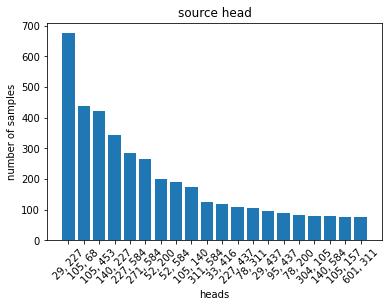

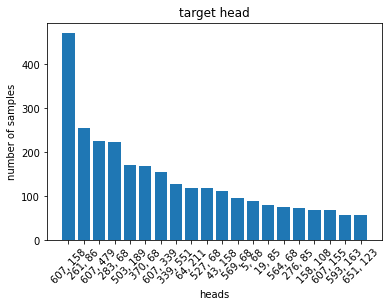

In [8]:
from collections import Counter

src_head = [(str(s[0]) + ", "  + str(s[1])) if len(s)>1 else (str(s[0]) + "," +'None') for s in combined['tokens_source']]
tgt_head = [(str(s[0]) + ", "  + str(s[1])) if len(s)>1 else (str(s[0]) + "," +'None') for s in combined['tokens_target']]

src_count = Counter(src_head).most_common(20)
tgt_count = Counter(tgt_head).most_common(20)


plt.title('source head')
plt.bar([x[0] for x in src_count], [x[1] for x in src_count])
plt.xticks(rotation=45)
plt.xlabel('heads')
plt.ylabel('number of samples')
plt.show()

plt.title('target head')
plt.bar([x[0] for x in tgt_count], [x[1] for x in tgt_count])
plt.xticks(rotation=45)
plt.xlabel('heads')
plt.ylabel('number of samples')
plt.show()

# EDA 결과 - 겹치지 않는 vocabulary
source와  target의 관계는 다음 중 하나라고 생각합니다.
1. target은 source의 translation 결과이다. (pair corpus)
2. source는 질문이고, target은 대답이다. (QA)
3. source와 target은 언어가 아니다

source의 vocab과 target의 vocab은 거의 겹치지 않는다는 사실을 발견했습니다.
유일하게 겹치는 token은 '68'로, '68'의 source에서의 등장 위치가 target에서의 등장 위치의 약 두배임을 확인했습니다. 이 때, 한 쪽에서 '68'이 등장하면 다른 쪽에도 '68'이 등장할 확률이 99% 이상이고(5227개 기준), 한 쪽에서 '68'이 등장하지만 다른 쪽에서는 등장하지 않는 경우는 34개, 11개이므로 source와 target에서 같은 token으로 쓰였다고 봐야 합니다.

결론적으로, source와 target에 대해 하나의 embedding matrix를 사용하더라도 문제가 발생하지 않습니다. target은 source의 translation 결과일 가능성이 높습니다. 

이 때 source의 vocab_size가 단 53개라는 점에서, source는 굉장히 제한된 상황의 자연어이거나, code 등의 인공어일 확률이 높다고 생각합니다. 이런 경우 pretrained model의 이점을 누리기 어려우므로, 

1. DL의 경우, 크기가 작은 transformer 모델을 사용
2. ML의 경우, MCMC를 활용하여 transition을 유추
3. COCO 등의 자연어 데이터 증강 툴을 이용하여 DA 수행

등의 방법을 생각할 수 있습니다.

어떤 경우든 데이터 포인트 간 중복되는 sub-sequence가 많아 sentencepiece로 재 토큰화하겠습니다.

# EDA 결과 - 재 토큰화

## Convert to string and tokenize with SentencePiece

Sentencepiece tokenizer는 내부적으로 Variational Inference를 활용하여 subword tokenization의 우선순위를 얻습니다. 

**Sentecepiece 관련 작성한 글**

[Sentencepiece 알고리즘 설명](https://https://velog.io/@gibonki77/SentencePiece)

[Variational Inference 튜토리얼](https://velog.io/@gibonki77/series/VariationalInference)

[EM 알고리즘을 통한 최적화 방법](https://velog.io/@gibonki77/VI-2)

중복되는 subsequence를 하나의 토큰으로 취급한다면 model이 transition을 더 잘 이해한다고 생각합니다. 

Senetencepiece는 문장을 입력으로 받도록 하는 구현체가 존재하고, 현재 입력을 바로 문자열로 넣는다면 하나의 숫자를 단어처럼 취급합니다. 이 경우 의미없는 tokenization이 됩니다.

> ex) '103' -> '_1'. '03'

이러한 문제를 해결하기 위해, 각 token_id를 서로 다른 "한 음절 한글 글자"로 변경했습니다.

**특히, 양쪽에서 같은 역할을 한다고 판단한 '68'의 경우, 특수 토큰으로 추가해 model이 최대한 활용할 수 있도록 하였습니다.**

> ex) '0' -> '가', '1' ->'각'

> ex) '68' -> '오'


한글 글자로 변환한 train_source와 train_target에 sentencepiece를 각각 적용해 subsequence token을 얻은 뒤, 다시 정수로 변환했습니다. 
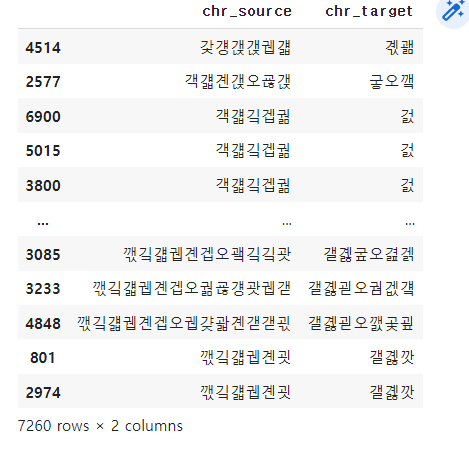

## Revert token_id to integer
정수 토큰으로 변환하는 과정에서 생각할 점이 여럿 있습니다. 특수 토큰(`BOS`, `EOS`, `'68'`)을 공통으로 사용해야 하고, token_id가  겹치면 안 됩니다. 이 문제는 기준 이상의 id에 source_vocab_size를 추가하는 방식으로 해결했습니다.

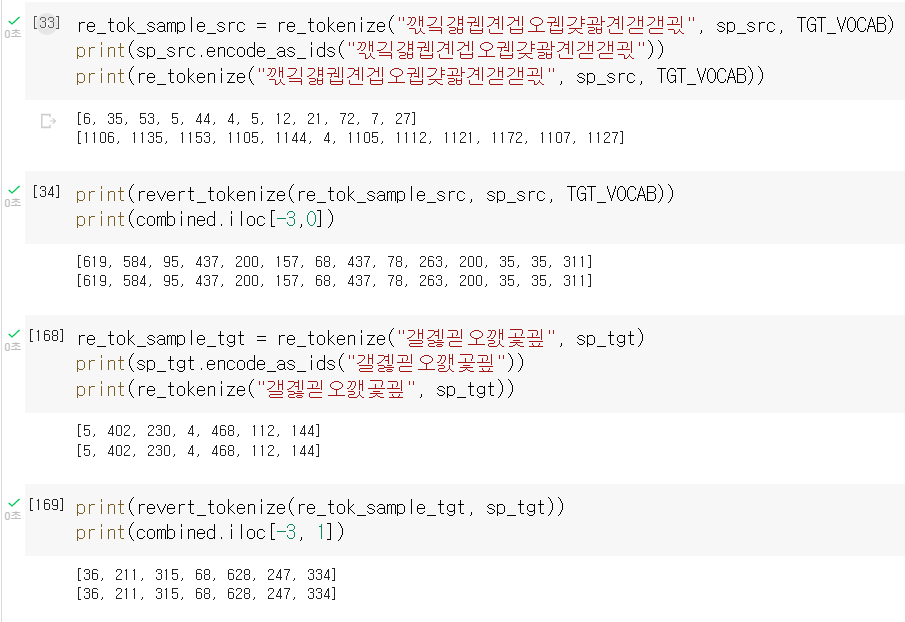



In [9]:
vocab_src = set()
vocab_tgt = set()

In [10]:
combined['tokens_source'].apply(lambda x: vocab_src.update(x))
combined['tokens_target'].apply(lambda x: vocab_tgt.update(x))

4514    None
2577    None
6900    None
5015    None
3800    None
        ... 
3085    None
3233    None
4848    None
801     None
2974    None
Name: tokens_target, Length: 7260, dtype: object

In [11]:
print(f"source vocab size: {len(vocab_src)}")
print(f"target vocab size: {len(vocab_tgt)}")


print(f"joint vocab size: {len(vocab_src.intersection(vocab_tgt))}")

print(f"max token_id: {max(max(vocab_src), max(vocab_tgt))}")
vocab_src.intersection(vocab_tgt)

source vocab size: 53
target vocab size: 595
joint vocab size: 1
max token_id: 658


{68}

In [ ]:
vocab_tgt

In [14]:
def custom_chr(x):
    if not isinstance(x, int):
        x = int(x) 
    if x == 68:
        return '오'  # 특수 토큰
    x = x + 0xAC00  # 한글로 변경
    assert len(chr(x)) == 1 and chr(x)!='_'
    return chr(x)

In [15]:
chr_tgt = set(map(custom_chr, vocab_tgt))
chr_tgt

{'가',
 '각',
 '갃',
 '간',
 '갅',
 '갆',
 '갇',
 '갈',
 '갉',
 '갊',
 '갋',
 '갌',
 '갍',
 '갎',
 '갏',
 '감',
 '갑',
 '값',
 '갓',
 '갔',
 '갖',
 '갘',
 '같',
 '갚',
 '갛',
 '개',
 '갞',
 '갟',
 '갠',
 '갢',
 '갤',
 '갥',
 '갦',
 '갧',
 '갩',
 '갪',
 '갫',
 '갬',
 '갭',
 '갮',
 '갯',
 '갰',
 '갱',
 '갲',
 '갳',
 '갵',
 '갶',
 '갷',
 '갸',
 '갺',
 '갻',
 '갼',
 '갽',
 '갾',
 '갿',
 '걀',
 '걁',
 '걂',
 '걃',
 '걅',
 '걆',
 '걇',
 '걈',
 '걊',
 '걋',
 '걌',
 '걍',
 '걏',
 '걐',
 '걑',
 '걒',
 '걔',
 '걕',
 '걖',
 '걗',
 '걘',
 '걙',
 '걚',
 '걛',
 '걝',
 '걞',
 '걠',
 '걡',
 '걢',
 '걣',
 '걤',
 '걥',
 '걦',
 '걨',
 '걪',
 '걫',
 '걬',
 '걮',
 '걯',
 '거',
 '걲',
 '걳',
 '건',
 '걵',
 '걶',
 '걷',
 '걸',
 '걹',
 '걺',
 '걻',
 '걼',
 '걽',
 '걾',
 '걿',
 '겁',
 '것',
 '겄',
 '겅',
 '겆',
 '겇',
 '겈',
 '겉',
 '겊',
 '겋',
 '겎',
 '겏',
 '겐',
 '겑',
 '겒',
 '겓',
 '겔',
 '겕',
 '겖',
 '겗',
 '겘',
 '겙',
 '겚',
 '겛',
 '겞',
 '겟',
 '겡',
 '겢',
 '겣',
 '겤',
 '겥',
 '겦',
 '겧',
 '겨',
 '격',
 '겪',
 '겫',
 '견',
 '겭',
 '겮',
 '겯',
 '결',
 '겱',
 '겲',
 '겳',
 '겴',
 '겵',
 '겶',
 '겷',
 '겸',
 '겹',
 '겺',
 '겻',
 '겼',
 '경',
 '겾',
 '겿',
 '곀'

In [16]:
chr_src = set(map(custom_chr, vocab_src))
chr_src

{'강',
 '갗',
 '객',
 '갡',
 '갣',
 '갨',
 '갴',
 '갹',
 '걉',
 '걎',
 '걓',
 '걜',
 '걟',
 '걧',
 '걩',
 '걭',
 '걱',
 '검',
 '겂',
 '게',
 '겜',
 '겝',
 '곈',
 '곊',
 '곣',
 '곤',
 '곥',
 '괇',
 '괌',
 '괏',
 '괡',
 '괰',
 '괷',
 '굀',
 '굇',
 '굖',
 '굱',
 '굾',
 '궒',
 '궠',
 '궵',
 '귅',
 '귇',
 '귈',
 '귱',
 '귲',
 '긁',
 '긭',
 '긿',
 '깈',
 '깙',
 '깫',
 '오'}

In [17]:
chr_combined = pd.DataFrame()
chr_combined['chr_source'] = combined['tokens_source'].apply(lambda x: ''.join([custom_chr(i) for i in x]))
chr_combined['chr_target'] = combined['tokens_target'].apply(lambda x: ''.join([custom_chr(i) for i in x]))

In [18]:
chr_combined

,chr_source,chr_target
4514,갗걩갡갡궵걟,곇괢
2577,객걟곈갡오굖갡,궇오꺀
6900,객걟깈겝궒,걼
5015,객걟깈겝궒,걼
3800,객걟깈겝궒,걼
...,...,...
3085,깫깈걟궵곈겝오괰깈깈괏,갤곓궆오겶겕
3233,깫깈걟궵곈겝오궒굖걩괏궵갣,갤곓괻오궘겞걬
4848,깫깈걟궵곈겝오궵걎괇곈갣갣괷,갤곓괻오깴곷굎
801,깫깈걟궵곈굇,갤곓깟


## SPM model

sentencepiece를 사용하기 위해 txt 파일로 저장합니다.

In [19]:
with open(PATH+'/spm_txt/chr_src.txt','w') as w:
    w.write('\n'.join(chr_combined['chr_source']))
with open(PATH+'/spm_txt/chr_tgt.txt','w') as w:
    w.write('\n'.join(chr_combined['chr_target']))

In [20]:
!pip install sentencepiece

In [21]:
import sentencepiece as spm

In [22]:
def spm_train(txt_path, prefix, size):

    templates= '--input={} \
    --pad_id={} \
    --bos_id={} \
    --eos_id={} \
    --unk_id={} \
    --model_prefix={} \
    --vocab_size={} \
    --character_coverage={} \
    --model_type={} \
    --user_defined_symbols={} \
    --split_by_whitespace=false'


    train_input_file = PATH + '/spm_txt'+ f'/{txt_path}'
    pad_id = 0  # <pad>
    vocab_size = size  # vocab size
    prefix =  PATH + '/spm_models' +  f'/{prefix}'
    bos_id = 1 # <start> token
    eos_id = 2 # <end> token
    unk_id = 3 # <unknown> token
    character_coverage = 1.0 # 보통 1
    model_type = 'unigram' # Choose from unigram (default), bpe, char, or word
    user_words ='오'


    cmd = templates.format(train_input_file,
                    pad_id,
                    bos_id,
                    eos_id,
                    unk_id,
                    prefix,
                    vocab_size,
                    character_coverage,
                    model_type,
                    user_words
                    )
    
    spm.SentencePieceTrainer.Train(cmd)

In [23]:
spm_train('chr_src.txt', 're_tokenize_src', 225)  # 225

In [24]:
TGT_VOCAB = 1100
spm_train('chr_tgt.txt', 're_tokenize_tgt',1100)  # 1100

## sp_src

In [25]:
pd.read_csv(PATH + '/spm_models/re_tokenize_src.vocab', names=['token', 'loss'], delimiter = '\t')

,token,loss
0,<pad>,0.0000
1,<s>,0.0000
2,</s>,0.0000
3,<unk>,0.0000
4,오,0.0000
...,...,...
220,굱,-11.9833
221,걓,-11.9834
222,곥,-11.9834
223,굾,-11.9834


In [26]:
sp_src = spm.SentencePieceProcessor()
vocab_file = PATH + '/spm_models/re_tokenize_src.model'
sp_src.load(vocab_file)

True

In [27]:
sp_src.encode_as_ids("깫깈걟궵곈겝오궵걎괇곈갣갣괷") # 뒤에서 3번째 (-3)

[6, 35, 53, 5, 44, 4, 5, 12, 21, 72, 7, 27]

## sp_tgt

In [28]:
pd.read_csv(PATH + '/spm_models/re_tokenize_tgt.vocab', names=['token', 'loss'], delimiter = '\t')

,token,loss
0,<pad>,0.0000
1,<s>,0.0000
2,</s>,0.0000
3,<unk>,0.0000
4,오,0.0000
...,...,...
1095,궲,-11.5687
1096,금,-11.5687
1097,깨,-11.5687
1098,궶,-11.5687


In [166]:
sp_tgt = spm.SentencePieceProcessor()
vocab_file = PATH + '/spm_models/re_tokenize_tgt.model'
sp_tgt.load(vocab_file)

True

In [167]:
sp_tgt.encode_as_ids("갤곓괻오깴곷굎") # 뒤에서 3번째 (-3)

[5, 402, 230, 4, 468, 112, 144]

## convert between 2 tokenization

0부터 4는 공통으로 사용하고, 1100까지는 target_vocab, 그 이후는 source_vocab으로 이루어져 있습니다.

In [31]:
def re_tokenize(in_str, sp_model, tgt_vocab_size=0):
    in_str.replace('▁',' ')
    sp_id = sp_model.encode_as_ids(in_str)
    res_tokens = [tok+tgt_vocab_size if tok>4 else tok for tok in sp_id]
    return res_tokens

In [177]:
def revert_tokenize(in_lst, sp_model, tgt_vocab_size=0):
    in_lst = [int(x-tgt_vocab_size) if x>4 else int(x) for x in in_lst]
    temp_str = ''.join(sp_model.id_to_piece(in_lst))
    temp_str = temp_str.replace('▁', '').replace(' ', '')
    # print(temp_str)
    org_tokens = [ord(x)-0xAC00 if x!='오' else 68 for x in temp_str]
    return org_tokens

In [33]:
re_tok_sample_src = re_tokenize("깫깈걟궵곈겝오궵걎괇곈갣갣괷", sp_src, TGT_VOCAB)
print(sp_src.encode_as_ids("깫깈걟궵곈겝오궵걎괇곈갣갣괷"))
print(re_tokenize("깫깈걟궵곈겝오궵걎괇곈갣갣괷", sp_src, TGT_VOCAB))

[6, 35, 53, 5, 44, 4, 5, 12, 21, 72, 7, 27]
[1106, 1135, 1153, 1105, 1144, 4, 1105, 1112, 1121, 1172, 1107, 1127]


In [34]:
print(revert_tokenize(re_tok_sample_src, sp_src, TGT_VOCAB))
print(combined.iloc[-3,0])

[619, 584, 95, 437, 200, 157, 68, 437, 78, 263, 200, 35, 35, 311]
[619, 584, 95, 437, 200, 157, 68, 437, 78, 263, 200, 35, 35, 311]


In [168]:
re_tok_sample_tgt = re_tokenize("갤곓괻오깴곷굎", sp_tgt)
print(sp_tgt.encode_as_ids("갤곓괻오깴곷굎"))
print(re_tokenize("갤곓괻오깴곷굎", sp_tgt))

[5, 402, 230, 4, 468, 112, 144]
[5, 402, 230, 4, 468, 112, 144]


In [169]:
print(revert_tokenize(re_tok_sample_tgt, sp_tgt))
print(combined.iloc[-3, 1])

[36, 211, 315, 68, 628, 247, 334]
[36, 211, 315, 68, 628, 247, 334]


## re_tok DataFrame

In [37]:
re_tok_combined = pd.DataFrame()
re_tok_combined['re_tok_source'] = chr_combined['chr_source'].apply(re_tokenize, args=(sp_src,TGT_VOCAB))
re_tok_combined['re_tok_target'] = chr_combined['chr_target'].apply(re_tokenize, args=(sp_tgt,))

In [38]:
re_tok_combined

,re_tok_source,re_tok_target
4514,"[1106, 1249, 1114, 1116, 1116, 1105, 1110]","[5, 74, 98]"
2577,"[1170, 1110, 1108, 1116, 4, 1184]","[5, 538, 4, 27]"
6900,"[1106, 1292]","[5, 51]"
5015,"[1106, 1292]","[5, 51]"
3800,"[1106, 1292]","[5, 51]"
...,...,...
3085,"[1106, 1135, 1153, 1105, 1144, 4, 1301]","[5, 426, 4, 221]"
3233,"[1106, 1135, 1153, 1105, 1144, 4, 1134, 1122, ...","[5, 402, 230, 4, 403, 13]"
4848,"[1106, 1135, 1153, 1105, 1144, 4, 1105, 1112, ...","[5, 402, 230, 4, 468, 112, 144]"
801,"[1106, 1135, 1153, 1105, 1108, 1109]","[5, 367]"


src의 최소 길이 : 1
src의 최대 길이 : 57
src의 평균 길이 : 12.557851239669422
tgt의 최소 길이 : 1
tgt의 최대 길이 : 42
tgt의 평균 길이 : 8.360192837465565


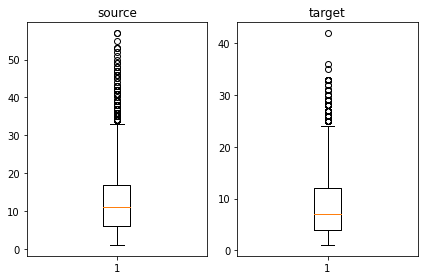

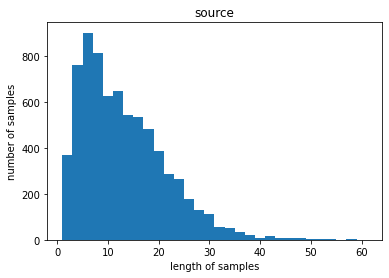

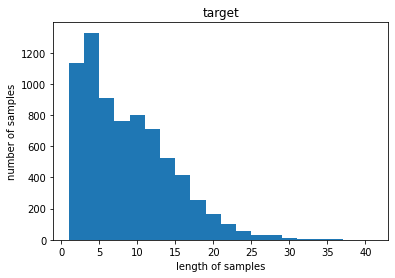

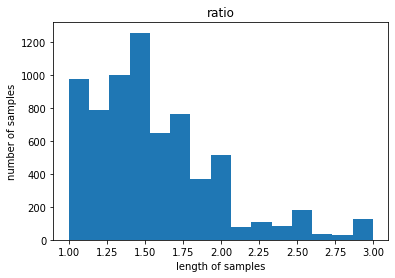

In [39]:
import matplotlib.pyplot as plt
import numpy as np


src_len = [len(s) for s in re_tok_combined['re_tok_source']]
tgt_len = [len(s) for s in re_tok_combined['re_tok_target']]

print('src의 최소 길이 : {}'.format(np.min(src_len)))
print('src의 최대 길이 : {}'.format(np.max(src_len)))
print('src의 평균 길이 : {}'.format(np.mean(src_len)))
print('tgt의 최소 길이 : {}'.format(np.min(tgt_len)))
print('tgt의 최대 길이 : {}'.format(np.max(tgt_len)))
print('tgt의 평균 길이 : {}'.format(np.mean(tgt_len)))

plt.subplot(1,2,1)
plt.boxplot(src_len)
plt.title('source')
plt.subplot(1,2,2)
plt.boxplot(tgt_len)
plt.title('target')
plt.tight_layout()
plt.show()

plt.title('source')
plt.hist(src_len, bins = 30, range=(1, 61))
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('target')
plt.hist(tgt_len, bins = 20, range=(1, 41))
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('ratio')
plt.hist([x/y for x,y in zip(src_len, tgt_len)], bins = 15, range=(1,3))
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [40]:
def bandpass_len(min_len, max_len, len_list):
    cnt = 0
    for s in len_list:
        if(s <= max_len) and (s >= min_len):
            cnt = cnt + 1
    print(f'전체 샘플 중 길이가 {min_len} 이상,{max_len} 이하인 샘플의 비율:{cnt / len(len_list)}')

In [41]:
bandpass_len(1, 40, src_len)
bandpass_len(1, 30, tgt_len)

전체 샘플 중 길이가 1 이상,40 이하인 샘플의 비율:0.9939393939393939
전체 샘플 중 길이가 1 이상,30 이하인 샘플의 비율:0.9977961432506887


In [42]:
SRC_MAX_LEN = 40
TGT_MAX_LEN = 30

In [43]:
new_vocab_src = set()
new_vocab_tgt = set()
re_tok_combined['re_tok_source'].apply(lambda x: new_vocab_src.update(x))
re_tok_combined['re_tok_target'].apply(lambda x: new_vocab_tgt.update(x))

print("actual num_classes: ", len(new_vocab_tgt))
print("total_vocab_size: ", len(new_vocab_src.union(new_vocab_tgt)))
NUM_CLASSES = len(new_vocab_tgt)
TOTAL_VOCAB = len(new_vocab_src.union(new_vocab_tgt))

actual num_classes:  1092
total_vocab_size:  1311


Tokenization을 완료했으니 modeling을 시작합니다.

# Modeling(transformer)

sequence to sequence 모델 중, 직접 구현한 경험이 있고, 익숙한 트랜스포머를 사용합니다. 데이터가 적기 때문에 적은 수의 layer를 사용했습니다.

[Postional Encoding이 그렇게 생긴 이유](https://velog.io/@gibonki77/DLmathPE)



## Create dataset

In [44]:
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [45]:
x_data = [s+[2] for s in re_tok_combined.re_tok_source] # add EOS
y_data = [[1]+s+[2] for s in re_tok_combined.re_tok_target]  # add BOS, EOS
assert len(x_data) == len(y_data)
print(len(x_data))

7260


In [46]:
train_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    x_data, 
    maxlen=SRC_MAX_LEN+1, 
    padding='post', 
    value=0)

print(train_inputs.shape)
train_inputs

(7260, 41)


array([[1106, 1249, 1114, ...,    0,    0,    0],
       [1170, 1110, 1108, ...,    0,    0,    0],
       [1106, 1292,    2, ...,    0,    0,    0],
       ...,
       [1106, 1135, 1153, ...,    0,    0,    0],
       [1106, 1135, 1153, ...,    0,    0,    0],
       [1106, 1135, 1153, ...,    0,    0,    0]], dtype=int32)

In [47]:
labels = tf.keras.preprocessing.sequence.pad_sequences(
    y_data, 
    maxlen=TGT_MAX_LEN+2, 
    padding='post', 
    value=0)

print(labels.shape)
labels

(7260, 32)


array([[  1,   5,  74, ...,   0,   0,   0],
       [  1,   5, 538, ...,   0,   0,   0],
       [  1,   5,  51, ...,   0,   0,   0],
       ...,
       [  1,   5, 402, ...,   0,   0,   0],
       [  1,   5, 367, ...,   0,   0,   0],
       [  1,   5, 367, ...,   0,   0,   0]], dtype=int32)

In [48]:
RDM_SEED = 42

In [49]:
x_train, x_test, y_train, y_test = train_test_split(train_inputs, labels, test_size=0.2, random_state=RDM_SEED)

print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

5808
5808
1452
1452


In [50]:
import tensorflow_datasets as tfds

BATCH_SIZE = 32
BUFFER_SIZE = 15000

def create_dataset(inputs, labels, is_shuffle=False):
    dataset = tf.data.Dataset.from_tensor_slices((
        {
            'inputs': inputs,
            'dec_inputs': labels[:, :-1]
        },
        {
            'outputs': labels[:, 1:]
        },
    ))

    dataset = dataset.cache()
    if is_shuffle:
        dataset = dataset.shuffle(BUFFER_SIZE)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

In [51]:
train_dataset = create_dataset(x_train, y_train, is_shuffle=True)
len(train_dataset)

182

In [52]:
test_dataset = create_dataset(x_test, y_test)
len(test_dataset)

46

## Transformer

In [53]:
# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) /
                            tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        # 각도 배열 생성
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)

        # 배열의 짝수 인덱스에는 sin 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])
        # 배열의 홀수 인덱스에는 cosine 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])

        # sin과 cosine이 교차되도록 재배열
        pos_encoding = tf.stack([sines, cosines], axis=0)
        pos_encoding = tf.transpose(pos_encoding, [1, 2, 0])
        pos_encoding = tf.reshape(pos_encoding, [position, d_model])

        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

In [54]:
# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
    # 어텐션 가중치는 Q와 K의 닷 프로덕트
    matmul_qk = tf.matmul(query, key, transpose_b=True)

    # 가중치를 정규화
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)

    # 패딩에 마스크 추가
    if mask is not None:
        logits += (mask * -1e9)

    # softmax적용
    attention_weights = tf.nn.softmax(logits, axis=-1)

    # 최종 어텐션은 가중치와 V의 닷 프로덕트
    output = tf.matmul(attention_weights, value)
    return output

In [55]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        self.dense = tf.keras.layers.Dense(units=d_model)

    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs['value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        # Q, K, V에 각각 Dense를 적용합니다
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # 병렬 연산을 위한 머리를 여러 개 만듭니다
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        # 스케일드 닷 프로덕트 어텐션 함수
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))

        # 최종 결과에도 Dense를 한 번 더 적용합니다
        outputs = self.dense(concat_attention)

        return outputs

In [56]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, sequence length)
    return mask[:, tf.newaxis, tf.newaxis, :]

def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    return tf.maximum(look_ahead_mask, padding_mask)

In [57]:
# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

    # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention = MultiHeadAttention(
        d_model, num_heads, name="attention")({
            'query': inputs,
            'key': inputs,
            'value': inputs,
            'mask': padding_mask
        })

    # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs + attention)

    # 두 번째 서브 레이어 : 2개의 완전연결층
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention + outputs)

    return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)

def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # num_layers만큼 쌓아올린 인코더의 층.
    for i in range(num_layers):
        outputs = encoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name="encoder_layer_{}".format(i),
        )([outputs, padding_mask])

    return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [58]:
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(
        shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention1 = MultiHeadAttention(
        d_model, num_heads, name="attention_1")(inputs={
            'query': inputs,
            'key': inputs,
            'value': inputs,
            'mask': look_ahead_mask
        })

    # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention1 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention1 + inputs)

    # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
    attention2 = MultiHeadAttention(
        d_model, num_heads, name="attention_2")(inputs={
            'query': attention1,
            'key': enc_outputs,
            'value': enc_outputs,
            'mask': padding_mask
        })

    # 마스크드 멀티 헤드 어텐션의 결과는
    # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention2 + attention1)

    # 세 번째 서브 레이어 : 2개의 완전연결층
    outputs = tf.keras.layers.Dense(
        units=units, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

  # 패딩 마스크
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  # Dropout
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

In [59]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더에서 패딩을 위한 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)

    # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
    # 내부적으로 패딩 마스크도 포함되어져 있습니다.
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask,
        output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)

    # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
    # 디코더에서 패딩을 위한 마스크
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)

    # 인코더
    enc_outputs = encoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[inputs, enc_padding_mask])

    # 디코더
    dec_outputs = decoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # 완전연결층
    outputs = tf.keras.layers.Dense(units=TOTAL_VOCAB, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

# Model Configuration & Train

In [60]:
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 128 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.08 # 드롭아웃의 비율

In [61]:
tf.keras.backend.clear_session()

print(TOTAL_VOCAB)
model = transformer(
    vocab_size=TOTAL_VOCAB,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

1311
Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, None)]       0           []                               
                                                                                                  
 dec_inputs (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 enc_padding_mask (Lambda)      (None, 1, 1, None)   0           ['inputs[0][0]']                 
                                                                                                  
 encoder (Functional)           (None, None, 128)    564352      ['inputs[0][0]',                 
                                                                  'enc_padding_mask

## Loss, Optimizer

In [62]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, TGT_MAX_LEN+1))

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

In [63]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

Text(0.5, 0, 'Train Step')

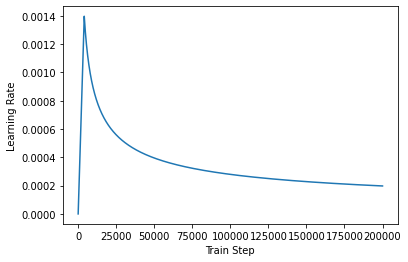

In [64]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [65]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)


def accuracy(y_true, y_pred):
    y_true = tf.cast(tf.reshape(y_true, shape=(-1, TGT_MAX_LEN + 1)), tf.int32)
    pad_mask = tf.cast(tf.math.less_equal(y_true, 3), tf.int32)

    y_pred = tf.math.argmax(y_pred, axis=-1, output_type=tf.int32)
    y_pred = tf.math.add(y_pred, pad_mask)
    
    match = tf.math.reduce_sum(tf.cast(tf.math.equal(y_true, y_pred), tf.int32))
    total = tf.math.reduce_sum(tf.cast(tf.math.greater(y_true, 3), tf.int32))

    return tf.math.divide(match, total)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [66]:
from keras.callbacks import ModelCheckpoint

filepath = PATH + '/models/my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             save_weights_only=True,
                             mode='min')
callbacks = [checkpoint]

In [67]:
EPOCHS = 30
with tf.device("/GPU:0"):
    history = model.fit(train_dataset, validation_data=test_dataset, epochs=EPOCHS, verbose=1, callbacks=callbacks)

Epoch 1/30
182/182 [==============================] - ETA: 0s - loss: 1.8642 - accuracy: 0.2335
Epoch 1: val_loss improved from inf to 1.53262, saving model to /content/drive/MyDrive/2022취업/Naver-papago/models/my_best_model.hdf5
182/182 [==============================] - 41s 112ms/step - loss: 1.8642 - accuracy: 0.2335 - val_loss: 1.5326 - val_accuracy: 0.3813
Epoch 2/30
182/182 [==============================] - ETA: 0s - loss: 1.3238 - accuracy: 0.3996
Epoch 2: val_loss improved from 1.53262 to 1.10760, saving model to /content/drive/MyDrive/2022취업/Naver-papago/models/my_best_model.hdf5
182/182 [==============================] - 18s 98ms/step - loss: 1.3238 - accuracy: 0.3996 - val_loss: 1.1076 - val_accuracy: 0.4009
Epoch 3/30
181/182 [============================>.] - ETA: 0s - loss: 1.0432 - accuracy: 0.4118
Epoch 3: val_loss improved from 1.10760 to 0.97396, saving model to /content/drive/MyDrive/2022취업/Naver-papago/models/my_best_model.hdf5
182/182 [====================

# Evaluation (training)

몇 번의 tuning 결과, 0.2011의 `val_loss`를 얻었습니다. 이 때 `val_acc`는 약 0.8648입니다.
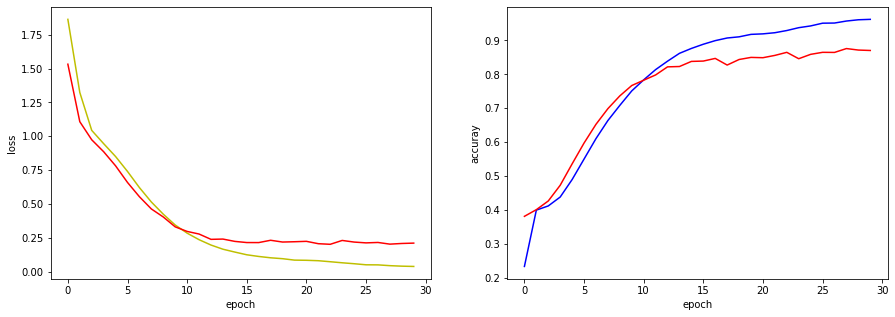

sample 단위로 decoding을 수행했을 때, 좋은 결과를 얻었습니다. 제대로 훈련되었음을 확인했습니다.
```python3
>>> y_pred = decoder_inference(x_data[40])
>>> print(y_pred, y_data[40])
[  1   5 412  35] [1, 5, 412, 35, 2]
```

In [68]:
model

In [69]:
def draw_history(history):
    fig = plt.figure(figsize=(15, 5))
    loss_ax = fig.add_subplot(1, 2, 1)
    acc_ax = fig.add_subplot(1, 2, 2)

    loss_ax.plot(history.history['loss'], 'y', label='train loss')
    loss_ax.plot(history.history['val_loss'], 'r', label='test loss')
    acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(history.history['val_accuracy'], 'r', label='test acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_xlabel('epoch')
    acc_ax.set_ylabel('accuray')

    plt.show()

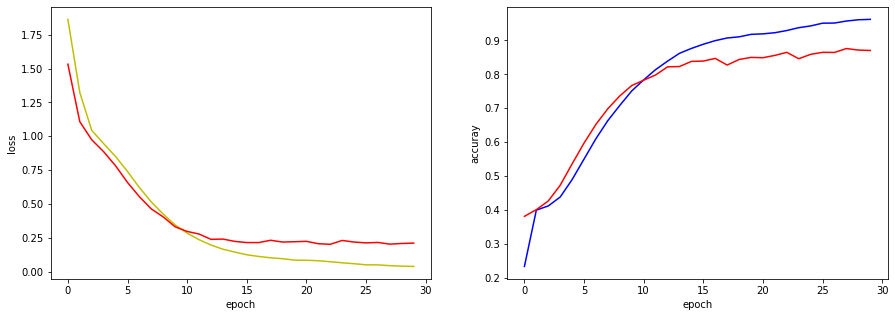

In [70]:
draw_history(history)


In [71]:
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})


In [72]:
def predict(sentence):
    sentence = tf.keras.preprocessing.sequence.pad_sequences([sentence], maxlen=TGT_MAX_LEN+1, padding='post')
    #sentence = tf.expand_dims(sentence, axis=0)

    output_sequence = tf.expand_dims([1], 0)

    predictions = model.predict([sentence, output_sequence])
    predictions = tf.nn.softmax(predictions)
    return predictions

In [73]:
x_data[0]

[1106, 1249, 1114, 1116, 1116, 1105, 1110, 2]

In [74]:
y_data[0]

[1, 5, 74, 98, 2]

In [75]:
pred = predict(x_data[0])

In [76]:
np.argsort(pred.numpy()[0,0], axis=0)[-1]

5

In [77]:
pred.shape

TensorShape([1, 1, 1311])

In [78]:
def decoder_inference(sentence):
    sentence = tf.keras.preprocessing.sequence.pad_sequences([sentence], maxlen=TGT_MAX_LEN+1, padding='post')
    # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
    # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. 
    output_sequence = tf.expand_dims([1], 0)

    # 디코더의 인퍼런스 단계
    for i in range(TGT_MAX_LEN):
        # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
        predictions = model(inputs=[sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]
        # 현재 예측한 단어의 정수
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
        if tf.equal(predicted_id, 2):
            #temp = [[2]]
            #temp[0].extend([0]*(TGT_MAX_LEN-(i+1)))
            #output_sequence = tf.concat([output_sequence, temp], axis=-1)
            break

        # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
        # 이 output_sequence는 다시 디코더의 입력이 됩니다.
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

    return tf.squeeze(output_sequence, axis=0).numpy()

In [79]:
y_pred = decoder_inference(x_data[40])
print(y_pred, y_data[40])

[  1   5 412  35] [1, 5, 412, 35, 2]


# Evaluation(test)
Test set에서 대해 inference를 수행합니다. 데이터를 불러오고, train set에서 사용한 tokenization을 변형 없이 그대로 수행했습니다. 문자열로 변환 후 새롭게 tokenize한 결과는 다음과 같습니다.

Decoding을 batch 단위로 수행하고, 원래의 데이터로 변환합니다.  

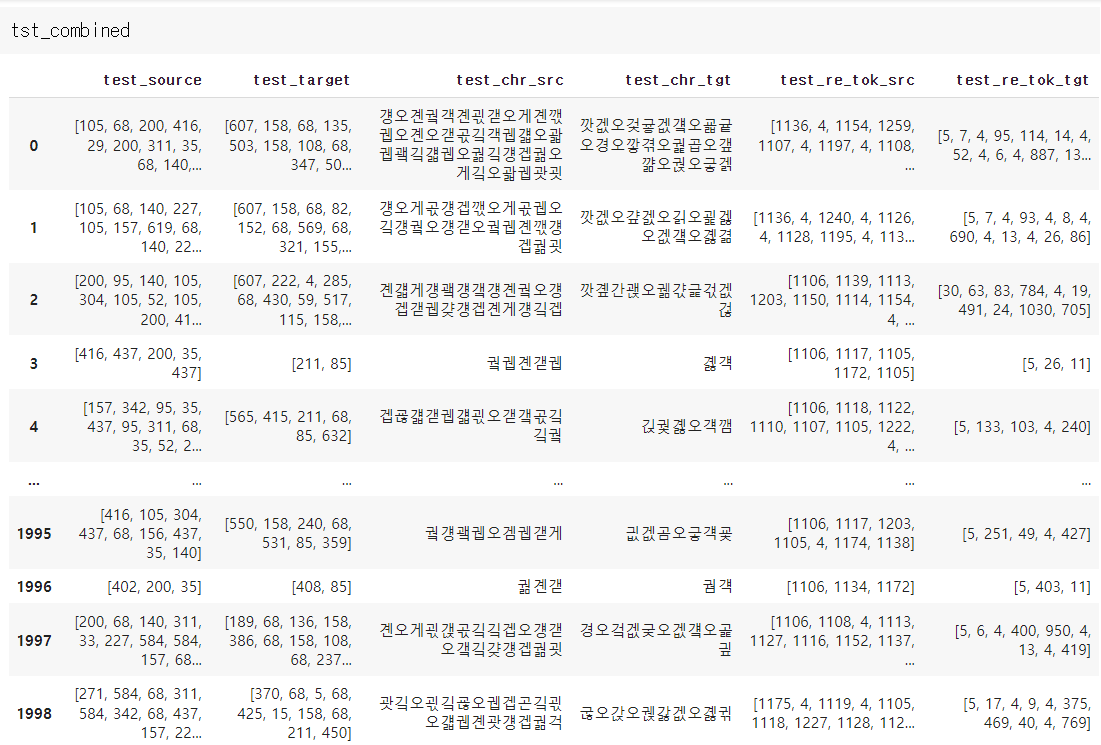

In [80]:
#model.save_weights(PATH+'/savedmodel/transformer')

In [81]:
tf.keras.backend.clear_session()
# TOTAL_VOCAB=1311
print(TOTAL_VOCAB)
loaded_model = transformer(
    vocab_size=TOTAL_VOCAB,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

loaded_model.summary()

1311
Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, None)]       0           []                               
                                                                                                  
 dec_inputs (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 enc_padding_mask (Lambda)      (None, 1, 1, None)   0           ['inputs[0][0]']                 
                                                                                                  
 encoder (Functional)           (None, None, 128)    564352      ['inputs[0][0]',                 
                                                                  'enc_padding_mask

In [82]:
loaded_model.load_weights(PATH+"/models/my_best_model.hdf5")

In [103]:
def decoder_inference_batch(input):
    # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
    # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장.
    output = tf.ones([input.shape[0], 1])
    output = tf.cast(output, tf.int64)
    eos_mask = tf.cast(tf.ones(input.shape[0]), tf.int64)
    # 디코더의 인퍼런스 단계
    for i in range(TGT_MAX_LEN-1):
        # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
        predictions = model(inputs=[input, output], training=False)
        predictions = predictions[:, -1:]
        # 현재 예측한 단어의 정수
        predicted_id = tf.argmax(predictions, axis=-1)

        eos_mask *= tf.cast(tf.not_equal(predicted_id, 2), tf.int64)
        predicted_id *= eos_mask
        output = tf.concat([output, predicted_id], axis=-1)
        #print(output.shape, predictions.shape, predicted_id.shape)
    return output.numpy()

In [97]:
tst_src = pd.read_csv(PATH + "/test_source.txt", sep="\t", names=["test_source"])
tst_tgt = pd.read_csv(PATH + "/test_target.txt", sep="\t", names=["test_target"])

tst_src = tst_src['test_source'].apply(to_tkn_lst)  # token을 원소로 갖는 리스트로 변환합니다.
tst_tgt = tst_tgt['test_target'].apply(to_tkn_lst)

tst_combined = pd.merge(tst_src, tst_tgt, left_index=True, right_index=True)
tst_combined['test_chr_src'] = tst_combined['test_source'].apply(lambda x: ''.join([custom_chr(i) for i in x]))
tst_combined['test_chr_tgt'] = tst_combined['test_target'].apply(lambda x: ''.join([custom_chr(i) for i in x]))

tst_combined['test_re_tok_src'] = tst_combined['test_chr_src'].apply(re_tokenize, args=(sp_src,TGT_VOCAB))
tst_combined['test_re_tok_tgt'] = tst_combined['test_chr_tgt'].apply(re_tokenize, args=(sp_tgt,))

In [86]:
tst_combined

,test_source,test_target,test_chr_src,test_chr_tgt,test_re_tok_src,test_re_tok_tgt
0,"[105, 68, 200, 416, 29, 200, 311, 35, 68, 140,...","[607, 158, 68, 135, 503, 158, 108, 68, 347, 50...",걩오곈궠객곈괷갣오게곈깫궵오곈오갣곣깈객궵걟오괇궵괰깈걟궵오궒깈걩겝궒오게깈오괇궵괏굇,깟겞오겇귷겞걬오굛귵오경오깧겪오궕곱오갶꺎오궍오긓겕,"[1136, 4, 1154, 1259, 1107, 4, 1197, 4, 1108, ...","[5, 7, 4, 95, 114, 14, 4, 52, 4, 6, 4, 887, 13..."
1,"[105, 68, 140, 227, 105, 157, 619, 68, 140, 22...","[607, 158, 68, 82, 152, 68, 569, 68, 321, 155,...",걩오게곣걩겝깫오게곣궵오깈걩궠오걩갣오궠궵곈깫걩겝궒굇,깟겞오걒겘오긹오굁겛오겞걬오곓겲,"[1136, 4, 1240, 4, 1126, 4, 1128, 1195, 4, 113...","[5, 7, 4, 93, 4, 8, 4, 690, 4, 13, 4, 26, 86]"
2,"[200, 95, 140, 105, 304, 105, 52, 105, 200, 41...","[607, 222, 4, 285, 68, 430, 59, 517, 115, 158,...",곈걟게걩괰걩갴걩곈궠오걩겝갣궵걎걩겝곈게걩깈겝,깟곞간괝오궮갻긅걳겞걶,"[1106, 1139, 1113, 1203, 1150, 1114, 1154, 4, ...","[30, 63, 83, 784, 4, 19, 491, 24, 1030, 705]"
3,"[416, 437, 200, 35, 437]","[211, 85]",궠궵곈갣궵,곓걕,"[1106, 1117, 1105, 1172, 1105]","[5, 26, 11]"
4,"[157, 342, 95, 35, 437, 95, 311, 68, 35, 52, 2...","[565, 415, 211, 68, 85, 632]",겝굖걟갣궵걟괷오갣갴곣깈깈궠,긵궟곓오걕깸,"[1106, 1118, 1122, 1110, 1107, 1105, 1222, 4, ...","[5, 133, 103, 4, 240]"
...,...,...,...,...,...,...
1995,"[416, 105, 304, 437, 68, 156, 437, 35, 140]","[550, 158, 240, 68, 531, 85, 359]",궠걩괰궵오겜궵갣게,긦겞곰오긓걕굧,"[1106, 1117, 1203, 1105, 4, 1174, 1138]","[5, 251, 49, 4, 427]"
1996,"[402, 200, 35]","[408, 85]",궒곈갣,궘걕,"[1106, 1134, 1172]","[5, 403, 11]"
1997,"[200, 68, 140, 311, 33, 227, 584, 584, 157, 68...","[189, 68, 136, 158, 386, 68, 158, 108, 68, 237...",곈오게괷갡곣깈깈겝오걩갣오갴깈걎걩겝궒굇,경오겈겞궂오겞걬오곭긮,"[1106, 1108, 4, 1113, 1127, 1116, 1152, 1137, ...","[5, 6, 4, 400, 950, 4, 13, 4, 419]"
1998,"[271, 584, 68, 311, 584, 342, 68, 437, 157, 22...","[370, 68, 5, 68, 425, 15, 158, 68, 211, 450]",괏깈오괷깈굖오궵겝곤깈괷오걟궵곈괏걩겝궒걱,굲오갅오궩갏겞오곓귂,"[1175, 4, 1119, 4, 1105, 1118, 1227, 1128, 112...","[5, 17, 4, 9, 4, 375, 469, 40, 4, 769]"


In [87]:
x_data_tst = [s+[2] for s in tst_combined.test_re_tok_src] # add EOS
y_data_tst = [[1]+s+[2] for s in tst_combined.test_re_tok_tgt]  # add BOS, EOS
assert len(x_data_tst) == len(y_data_tst)
print(len(x_data_tst))

2000


In [88]:
test_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    x_data_tst, 
    maxlen=SRC_MAX_LEN+1, 
    padding='post', 
    value=0)

print(test_inputs.shape)
test_inputs

(2000, 41)


array([[1136,    4, 1154, ...,    0,    0,    0],
       [1136,    4, 1240, ...,    0,    0,    0],
       [1106, 1139, 1113, ...,    0,    0,    0],
       ...,
       [1106, 1108,    4, ...,    0,    0,    0],
       [1175,    4, 1119, ...,    0,    0,    0],
       [1136, 1191,    4, ...,    0,    0,    0]], dtype=int32)

In [101]:
tst_dataset = tf.data.Dataset.from_tensor_slices(test_inputs)
tst_dataset = tst_dataset.cache()
tst_dataset = tst_dataset.batch(256)
tst_dataset = tst_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [102]:
len(tst_dataset)

8

In [ ]:
def decode_tst_set(tst_dataset):
    y_preds = []

    with tf.device('/GPU:0'):
        for idx, p in enumerate(tst_dataset.take(len(tst_dataset))):
            y_preds.append(decoder_inference_batch(p))

    for i in range(8):
        if not i:
            preds = y_preds[i]
        else:
            preds = np.concatenate((preds, y_preds[i]),axis=0)
    
    y_pred_processed = [x[2:] for x in preds]
    y_pred_processed = [[s for s in x if s!=2]  for x in y_pred_processed]
    return y_pred_processed

In [ ]:
y_pred_processed = decode_tst_set(tst_dataset)

# Inference 결과
Sentencepiece로 재 토큰화한 sequence의 inference 결과는 다음과 같습니다.
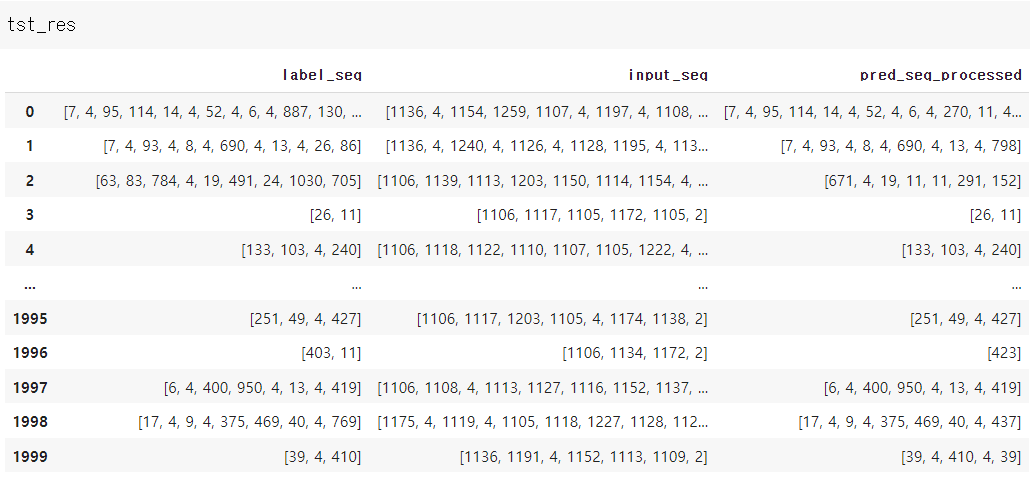

In [138]:
tst_res = pd.DataFrame()
label_seq = [s[1:] for s in tst_combined.test_re_tok_tgt]

tst_res['label_seq'] = label_seq
tst_res['input_seq'] = x_data_tst
tst_res['pred_seq_processed'] = y_pred_processed

In [139]:
tst_res

,label_seq,input_seq,pred_seq_processed
0,"[7, 4, 95, 114, 14, 4, 52, 4, 6, 4, 887, 130, ...","[1136, 4, 1154, 1259, 1107, 4, 1197, 4, 1108, ...","[7, 4, 95, 114, 14, 4, 52, 4, 6, 4, 270, 11, 4..."
1,"[7, 4, 93, 4, 8, 4, 690, 4, 13, 4, 26, 86]","[1136, 4, 1240, 4, 1126, 4, 1128, 1195, 4, 113...","[7, 4, 93, 4, 8, 4, 690, 4, 13, 4, 798]"
2,"[63, 83, 784, 4, 19, 491, 24, 1030, 705]","[1106, 1139, 1113, 1203, 1150, 1114, 1154, 4, ...","[671, 4, 19, 11, 11, 291, 152]"
3,"[26, 11]","[1106, 1117, 1105, 1172, 1105, 2]","[26, 11]"
4,"[133, 103, 4, 240]","[1106, 1118, 1122, 1110, 1107, 1105, 1222, 4, ...","[133, 103, 4, 240]"
...,...,...,...
1995,"[251, 49, 4, 427]","[1106, 1117, 1203, 1105, 4, 1174, 1138, 2]","[251, 49, 4, 427]"
1996,"[403, 11]","[1106, 1134, 1172, 2]",[423]
1997,"[6, 4, 400, 950, 4, 13, 4, 419]","[1106, 1108, 4, 1113, 1127, 1116, 1152, 1137, ...","[6, 4, 400, 950, 4, 13, 4, 419]"
1998,"[17, 4, 9, 4, 375, 469, 40, 4, 769]","[1175, 4, 1119, 4, 1105, 1118, 1227, 1128, 112...","[17, 4, 9, 4, 375, 469, 40, 4, 437]"


# Metric
metric으로 `gold_accuracy`와 `rouge-2`, `rouge-l`을 사용했습니다. 

`gold_accuracy`는 label과 pred가 완전히 일치할 확률입니다.

'rouge'는 recall 기반의 metric으로, **label**에 있는 token이 pred에 있는 정도를 측정합니다. `rouge-2`의 경우, label에 존재하는 bigram이 pred에도 존재할 비율이고, `rouge-l`은 최장 공통 subsequence와 label의 길이의 비율입니다.

최종 결과는 다음과 같습니다.

| model | Gold_acc | Rouge-2 | Rouge-l |
|---|---|---|---|
| transformer + SentencePiece | 0.315 | 0.748 | 0.818 |

In [178]:
tst_res['org_pred'] = [revert_tokenize(x, sp_tgt) for x in y_pred_processed]

In [179]:
final_res = pd.DataFrame()
final_res['label'] = tst_combined['test_target']
final_res['pred'] = tst_res['org_pred']

## Gold accuracy

In [151]:
def gold_accuracy(y_true, y_pred):
    count = 0
    corr = 0
    for idx, tr in enumerate(y_true):
        if len(y_pred[idx]) == len(tr):
            if all(x1 == x2 for (x1, x2) in zip(tr, y_pred[idx])):
                corr += 1
        count += 1
    return corr/count

In [180]:
gold_accuracy(final_res['label'], final_res['pred'])

0.315

In [181]:
final_res

,label,pred
0,"[607, 158, 68, 135, 503, 158, 108, 68, 347, 50...","[607, 158, 68, 135, 503, 158, 108, 68, 347, 50..."
1,"[607, 158, 68, 82, 152, 68, 569, 68, 321, 155,...","[607, 158, 68, 82, 152, 68, 569, 68, 321, 155,..."
2,"[607, 222, 4, 285, 68, 430, 59, 517, 115, 158,...","[189, 550, 158, 25, 68, 430, 85, 85, 389, 158,..."
3,"[211, 85]","[211, 85]"
4,"[565, 415, 211, 68, 85, 632]","[565, 415, 211, 68, 85, 632]"
...,...,...
1995,"[550, 158, 240, 68, 531, 85, 359]","[550, 158, 240, 68, 531, 85, 359]"
1996,"[408, 85]","[164, 85]"
1997,"[189, 68, 136, 158, 386, 68, 158, 108, 68, 237...","[189, 68, 136, 158, 386, 68, 158, 108, 68, 237..."
1998,"[370, 68, 5, 68, 425, 15, 158, 68, 211, 450]","[370, 68, 5, 68, 425, 15, 158, 68, 211, 149]"


In [182]:
final_res.to_csv(PATH+'/spm_transformer315.txt', index=False, sep='\t')

## Rouge

In [186]:
pip install rouge

In [188]:
from rouge import Rouge

model_out = ["he began by starting a five person war cabinet and included chamberlain as lord president of the council",
             "the siege lasted from 250 to 241 bc, the romans laid siege to lilybaeum",
             "the original ocean water was found in aquaculture"]

reference = ["he began his premiership by forming a five-man war cabinet which included chamberlain as lord president of the council",
             "the siege of lilybaeum lasted from 250 to 241 bc, as the roman army laid siege to the carthaginian-held sicilian city of lilybaeum",
             "the original mission was for research into the uses of deep ocean water in ocean thermal energy conversion (otec) renewable energy production and in aquaculture"]
rouge = Rouge()
rouge.get_scores(model_out, reference, avg=True)

{'rouge-1': {'f': 0.6512670259900423,
  'p': 0.8539562289562289,
  'r': 0.5528035775713794},
 'rouge-2': {'f': 0.3928074411537155,
  'p': 0.5244559362206421,
  'r': 0.3353174603174603},
 'rouge-l': {'f': 0.6282785202429159,
  'p': 0.8122895622895623,
  'r': 0.5369305616983636}}

글자로 변형하여 rouge score를 계산합니다.

In [200]:
def calc_rouge(pred, refer):
    if not pred:
        return [0, 0]
    pred = ' '.join([chr(x+0xAC00) for x in pred])
    refer = ' '.join([chr(x+0xAC00) for x in refer])
    scores = rouge.get_scores([pred], [refer], avg=True)
    rouge_2_score = scores['rouge-2']['r']
    rouge_l_score = scores['rouge-l']['r']
    return [rouge_2_score, rouge_l_score]

In [201]:
rouge_scores = final_res.apply(lambda x: calc_rouge(x['pred'], x['label']), axis=1)

In [204]:
final_res['rouge_2'] = [x[0] for x in rouge_scores]
final_res['rouge_l'] = [x[1] for x in rouge_scores]
final_res

,label,pred,rouge_2,rouge_l
0,"[607, 158, 68, 135, 503, 158, 108, 68, 347, 50...","[607, 158, 68, 135, 503, 158, 108, 68, 347, 50...",0.880000,0.888889
1,"[607, 158, 68, 82, 152, 68, 569, 68, 321, 155,...","[607, 158, 68, 82, 152, 68, 569, 68, 321, 155,...",0.866667,0.818182
2,"[607, 222, 4, 285, 68, 430, 59, 517, 115, 158,...","[189, 550, 158, 25, 68, 430, 85, 85, 389, 158,...",0.200000,0.363636
3,"[211, 85]","[211, 85]",1.000000,1.000000
4,"[565, 415, 211, 68, 85, 632]","[565, 415, 211, 68, 85, 632]",1.000000,1.000000
...,...,...,...,...
1995,"[550, 158, 240, 68, 531, 85, 359]","[550, 158, 240, 68, 531, 85, 359]",1.000000,1.000000
1996,"[408, 85]","[164, 85]",0.000000,0.500000
1997,"[189, 68, 136, 158, 386, 68, 158, 108, 68, 237...","[189, 68, 136, 158, 386, 68, 158, 108, 68, 237...",1.000000,1.000000
1998,"[370, 68, 5, 68, 425, 15, 158, 68, 211, 450]","[370, 68, 5, 68, 425, 15, 158, 68, 211, 149]",0.888889,0.875000


In [205]:
print('Rouge-2 score: ', final_res['rouge_2'].mean())
print('Rouge-l score: ', final_res['rouge_l'].mean())

Rouge-2 score:  0.7482858663649259
Rouge-l score:  0.8180523861598165
